In [14]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%autoreload 2

In [20]:
from main import run_train

In [25]:
net = run_train(30)

Epoch 0 Avg Loss: 81.90342232645774
Epoch 1 Avg Loss: 52.34667196079176
Epoch 2 Avg Loss: 51.08865911133435
Epoch 3 Avg Loss: 50.20754924112437
Epoch 4 Avg Loss: 49.93157071483378
Epoch 5 Avg Loss: 49.16034570032237
Epoch 6 Avg Loss: 48.27491891627409
Epoch 7 Avg Loss: 47.868334721545786
Epoch 8 Avg Loss: 47.25276417148356
Epoch 9 Avg Loss: 46.648025877621706
Epoch 10 Avg Loss: 45.9521918929353
Epoch 11 Avg Loss: 44.72074804014089
Epoch 12 Avg Loss: 43.52825134141104
Epoch 13 Avg Loss: 43.062098512844166
Epoch 14 Avg Loss: 42.68492417432824
Epoch 15 Avg Loss: 42.278208430932494
Epoch 16 Avg Loss: 41.925680145925405
Epoch 17 Avg Loss: 41.59921942438398
Epoch 18 Avg Loss: 41.1962755358949
Epoch 19 Avg Loss: 40.91444839263449
Epoch 20 Avg Loss: 40.623213534452475
Epoch 21 Avg Loss: 40.35101573321284
Epoch 22 Avg Loss: 40.104097050063466
Epoch 23 Avg Loss: 39.812194211142405
Epoch 24 Avg Loss: 39.54320447298945
Epoch 25 Avg Loss: 39.2396988674086
Epoch 26 Avg Loss: 38.83050908847731
Epoch 

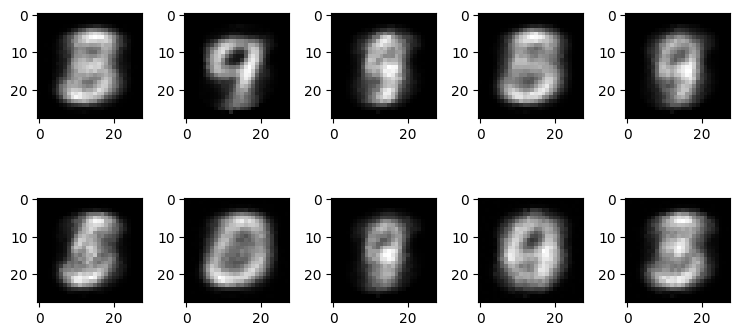

In [24]:
from main import visualize_out
visualize_out(net, 10, 128)